# (1) Doing Importing And Reading ABALONE DATASET

In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error as mse
import math
from math import sqrt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import ProbPlot
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingRegressor



In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
names =['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# (2) Cleaning DATASET

In [5]:
data['Age'] = data['Rings']+1.5

In [6]:
 data.drop('Rings', axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [8]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [9]:
data.shape

(4177, 9)

In [10]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [11]:
 data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Age,4177.0,11.433684,3.224169,2.5000,9.5000,10.5000,12.500,30.5000


# (3) EDA

<Figure size 576x1080 with 0 Axes>

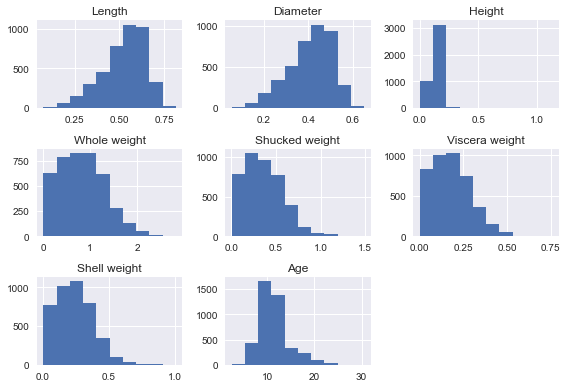

In [12]:
plt.figure(figsize=(8,15)) 
plt.style.use('seaborn')
data.hist()
plt.tight_layout()
plt.show()

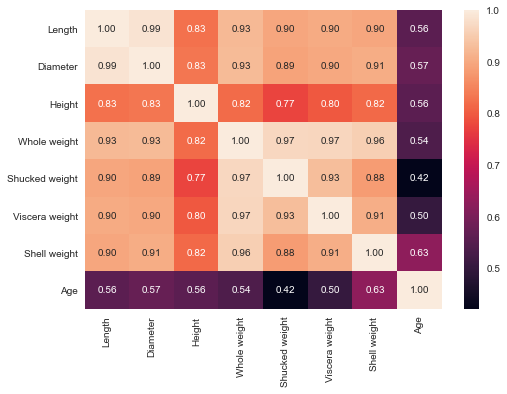

In [13]:
plt.figure()
sns.heatmap(data.corr(),annot= True, fmt='.2f')
plt.show()

In [14]:
data.duplicated().sum()

0

In [15]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

<Figure size 576x576 with 0 Axes>

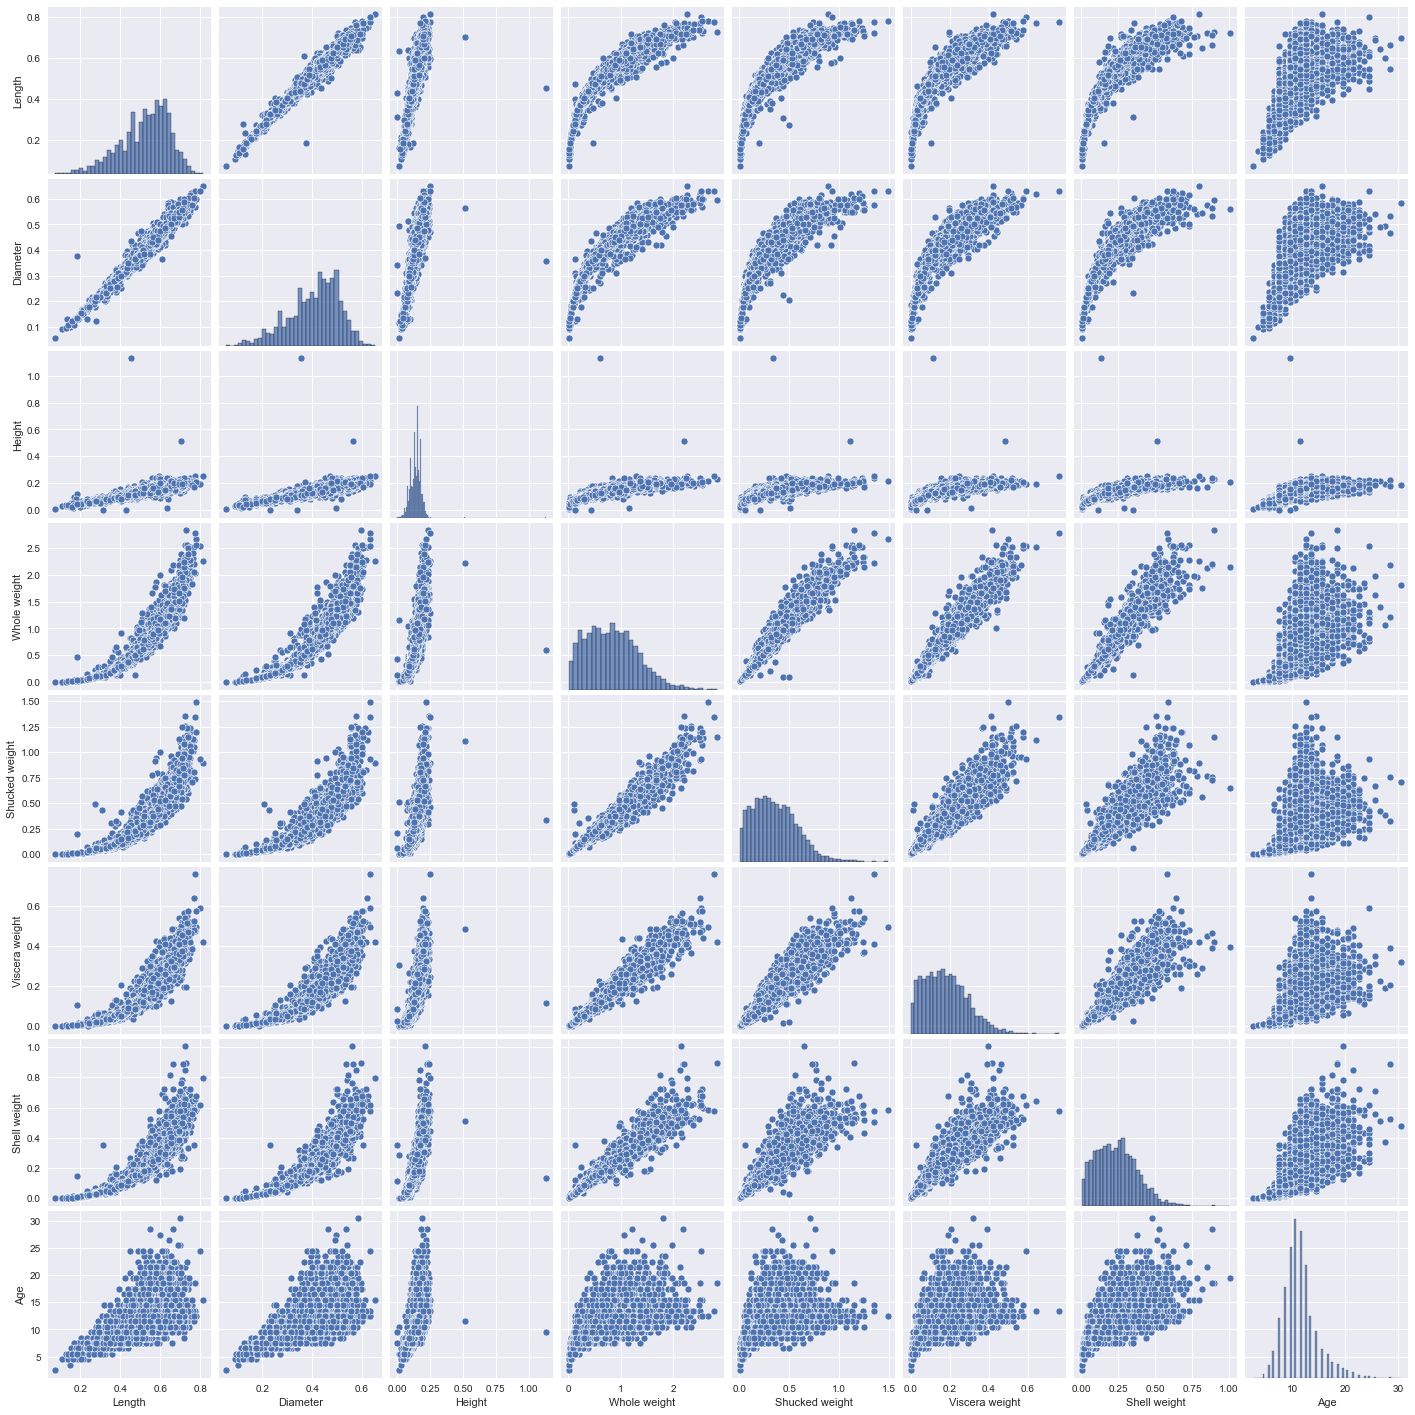

In [16]:
plt.figure(figsize=(8,8))
sns.pairplot(data)
plt.show()

In [17]:
data['Sex'] = data['Sex'].map({"M":0, "F":1, "I":2})

<AxesSubplot:xlabel='Sex', ylabel='count'>

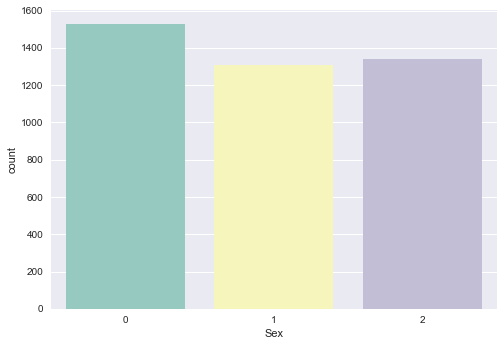

In [18]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

In [19]:
print("The max of Diameter is: ",data['Diameter'].max())
print("The min of Diameter is: ",data['Diameter'].min())
print("The count of Diameter is: ",data['Diameter'].count())
print("The sum of Diameter is: ",data['Diameter'].sum())
print("The mean of Diameter is: ",data['Diameter'].mean())
print("The median of Diameter is: ",data['Diameter'].median ())

The max of Diameter is:  0.65
The min of Diameter is:  0.055
The count of Diameter is:  4177
The sum of Diameter is:  1703.72
The mean of Diameter is:  0.407881254488869
The median of Diameter is:  0.425


In [20]:
print("The max of Shell weight is: ",data['Shell weight'].max())
print("The min of Shell weight is: ",data['Shell weight'].min())
print("The count of Shell weight is: ",data['Shell weight'].count())
print("The sum of Shell weight is: ",data['Shell weight'].sum())
print("The mean of Shell weight is: ",data['Shell weight'].mean())
print("The median of Shell weight is: ",data['Shell weight'].median ())

The max of Shell weight is:  1.005
The min of Shell weight is:  0.0015
The count of Shell weight is:  4177
The sum of Shell weight is:  997.5964999999999
The mean of Shell weight is:  0.23883085946851795
The median of Shell weight is:  0.234


In [21]:
print("The max of Height is: ",data['Height'].max())
print("The min ofHeight is: ",data['Height'].min())
print("The count of Height is: ",data['Height'].count())
print("The sum of Height is: ",data['Height'].sum())
print("The mean of Height is: ",data['Height'].mean())
print("The median of Height is: ",data['Height'].median ())

The max of Height is:  1.13
The min ofHeight is:  0.0
The count of Height is:  4177
The sum of Height is:  582.76
The mean of Height is:  0.1395163993296614
The median of Height is:  0.14


In [22]:
print("The max of Whole weight is: ",data['Whole weight'].max())
print("The min Whole weight is: ",data['Whole weight'].min())
print("The count of Whole weight is: ",data['Whole weight'].count())
print("The sum of Whole weight is: ",data['Whole weight'].sum())
print("The mean of Whole weight is: ",data['Whole weight'].mean())
print("The median of Whole weight is: ",data['Whole weight'].median ())

The max of Whole weight is:  2.8255
The min Whole weight is:  0.002
The count of Whole weight is:  4177
The sum of Whole weight is:  3461.656
The mean of Whole weight is:  0.82874215944458
The median of Whole weight is:  0.7995


In [23]:
print("The max of Length is: ",data['Length'].max())
print("The min Length is: ",data['Length'].min())
print("The count of Length is: ",data['Length'].count())
print("The sum of Length is: ",data['Length'].sum())
print("The mean of Length is: ",data['Length'].mean())
print("The median of Length is: ",data['Length'].median ())

The max of Length is:  0.815
The min Length is:  0.075
The count of Length is:  4177
The sum of Length is:  2188.715
The mean of Length is:  0.5239920995930099
The median of Length is:  0.545


In [24]:
print("The max of Shucked weight is: ",data['Shucked weight'].max())
print("The min Shucked weight is: ",data['Shucked weight'].min())
print("The count of Shucked weight is: ",data['Shucked weight'].count())
print("The sum of Shucked weight is: ",data['Shucked weight'].sum())
print("The mean of Shucked weight is: ",data['Shucked weight'].mean())
print("The median of Shucked weight is: ",data['Shucked weight'].median ())

The max of Shucked weight is:  1.488
The min Shucked weight is:  0.001
The count of Shucked weight is:  4177
The sum of Shucked weight is:  1501.078
The mean of Shucked weight is:  0.35936748862820106
The median of Shucked weight is:  0.336


In [25]:
print("The max of Viscera weight is: ",data['Viscera weight'].max())
print("The min of Viscera weight is: ",data['Viscera weight'].min())
print("The count of Viscera weight is: ",data['Viscera weight'].count())
print("The sum of Viscera weight is: ",data['Viscera weight'].sum())
print("The mean of Viscera weight is: ",data['Viscera weight'].mean())
print("The median of Viscera weight is: ",data['Viscera weight'].median ())

The max of Viscera weight is:  0.76
The min of Viscera weight is:  0.0005
The count of Viscera weight is:  4177
The sum of Viscera weight is:  754.3394999999999
The mean of Viscera weight is:  0.18059360785252604
The median of Viscera weight is:  0.171


In [26]:
print("The max of Age is: ",data['Age'].max())
print("The min of Age is: ",data['Age'].min())
print("The count of Age is: ",data['Age'].count())
print("The sum of Age is: ",data['Age'].sum())
print("The mean of Age is: ",data['Age'].mean())
print("The median of Age is: ",data['Age'].median ())

The max of Age is:  30.5
The min of Age is:  2.5
The count of Age is:  4177
The sum of Age is:  47758.5
The mean of Age is:  11.433684462532918
The median of Age is:  10.5


In [27]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
2,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
0,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
1,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


Text(0.5, 1.0, 'Height vs Sex')

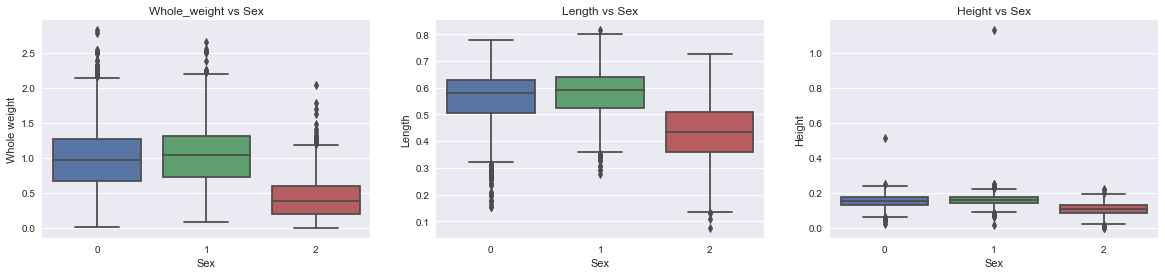

In [28]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Whole weight', data = data, ax = axes[0])
axes[0].set_title('Whole_weight vs Sex')

sns.boxplot(x = 'Sex', y = 'Length', data = data, ax = axes[1])
axes[1].set_title('Length vs Sex')

sns.boxplot(x = 'Sex', y = 'Height', data = data, ax = axes[2])
axes[2].set_title('Height vs Sex')

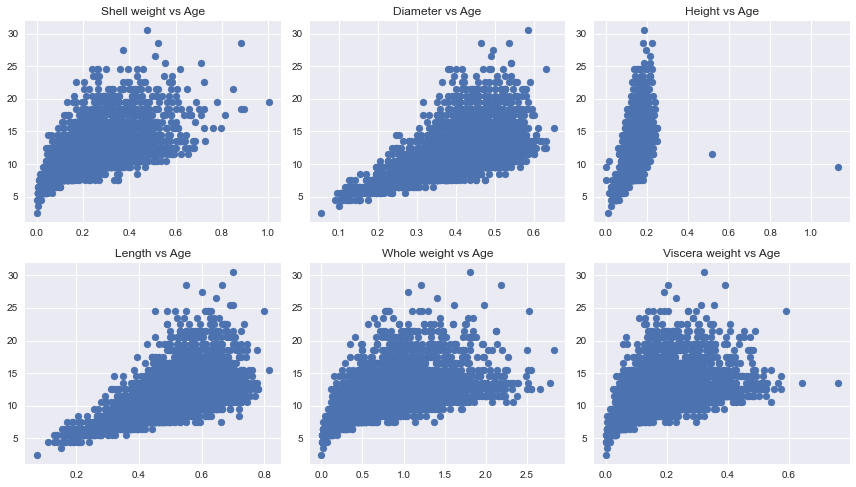

In [29]:
plt.figure(figsize=(12, 10))

plt.subplot(3,3,1)
plt.title('Shell weight vs Age')
plt.scatter(data['Shell weight'],data['Age'])

plt.subplot(3,3,2)
plt.title('Diameter vs Age')
plt.scatter(data['Diameter'],data['Age'])

plt.subplot(3,3,3)
plt.title('Height vs Age')
plt.scatter(data['Height'],data['Age'])

plt.subplot(3,3,4)
plt.title('Length vs Age')
plt.scatter(data['Length'],data['Age'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Age')
plt.scatter(data['Whole weight'],data['Age'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Age')
plt.scatter(data['Viscera weight'],data['Age'])

plt.tight_layout()

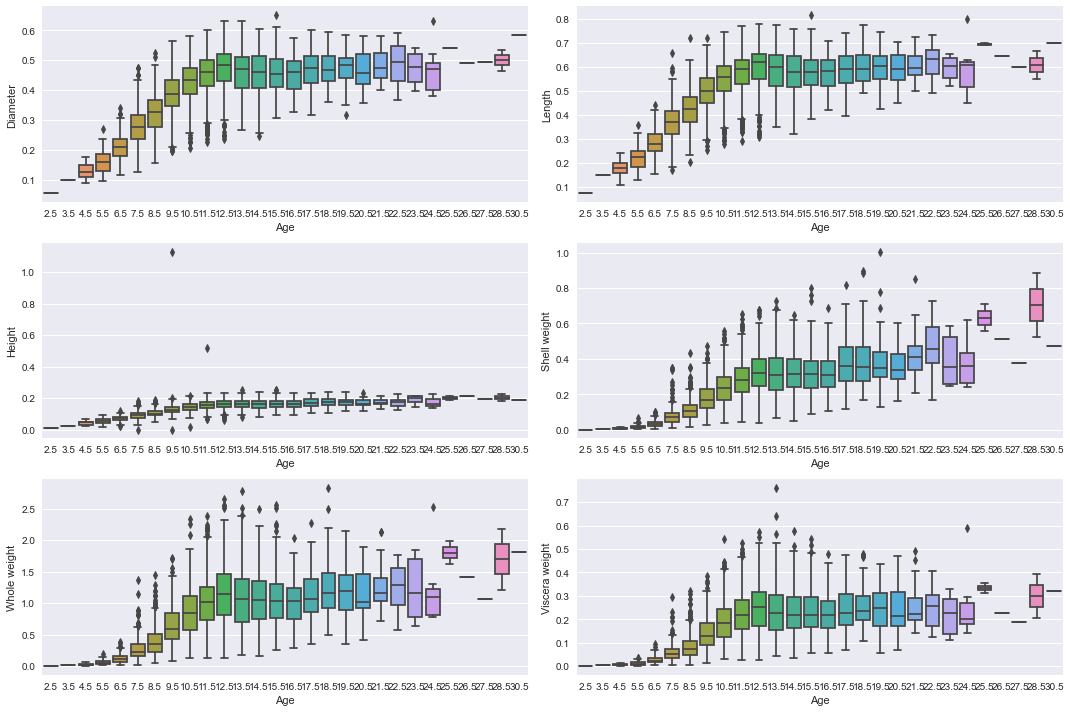

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.boxplot(data= data, x = 'Age', y = 'Diameter')

plt.subplot(3,2,2)
sns.boxplot(data= data, x = 'Age', y = 'Length')

plt.subplot(3,2,3)
sns.boxplot(data= data, x = 'Age', y = 'Height')

plt.subplot(3,2,4)
sns.boxplot(data= data, x = 'Age', y = 'Shell weight')

plt.subplot(3,2,5)
sns.boxplot(data= data, x = 'Age', y = 'Whole weight')

plt.subplot(3,2,6)
sns.boxplot(data= data, x = 'Age', y = 'Viscera weight')
plt.tight_layout()

In [31]:
data['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
3.5       1
26.5      1
27.5      1
30.5      1
2.5       1
Name: Age, dtype: int64

In [32]:
data['Sex'].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

In [33]:
Y=data["Age"]

In [34]:
X=data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex']]

In [35]:
nf = data.select_dtypes(include=[np.number]).columns
nf

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [36]:
cf = data.select_dtypes(include=[np.object]).columns
cf

<ipython-input-36-4028633cd10a>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cf = data.select_dtypes(include=[np.object]).columns


Index([], dtype='object')

In [37]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

# print('Training Data Count: {}'.format(X_train.shape[0]))
# print('Testing Data Count: {}'.format(X_test.shape[0]))

In [38]:
# import statsmodels.api as sm
# from statsmodels.tools.eval_measures import mse, rmse

# X_train = sm.add_constant(X_train)
# results = sm.OLS(y_train, X_train).fit()
# results.summary()

- we see p<0.05 , it gives better result 
- In my model, 54.3% of the variance can be explained, which is good.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


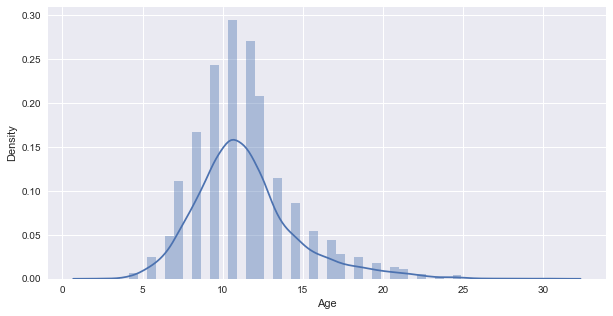

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(data['Age'])
plt.show()

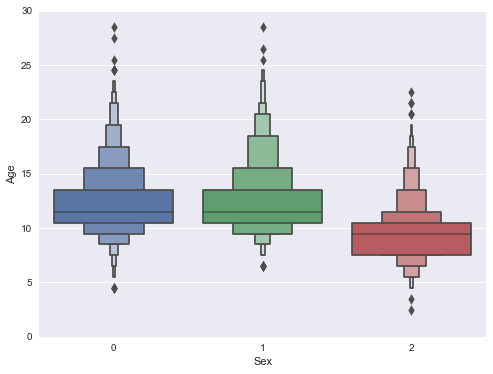

In [37]:
data1 = pd.concat([data['Age'], data['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Age", data=data)
fig.axis(ymin=0, ymax=30);

same Distribution between male and female , and age is between 8 to 19


# train and test 

In [58]:

train, test = train_test_split(data, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


In [59]:
numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'Age'

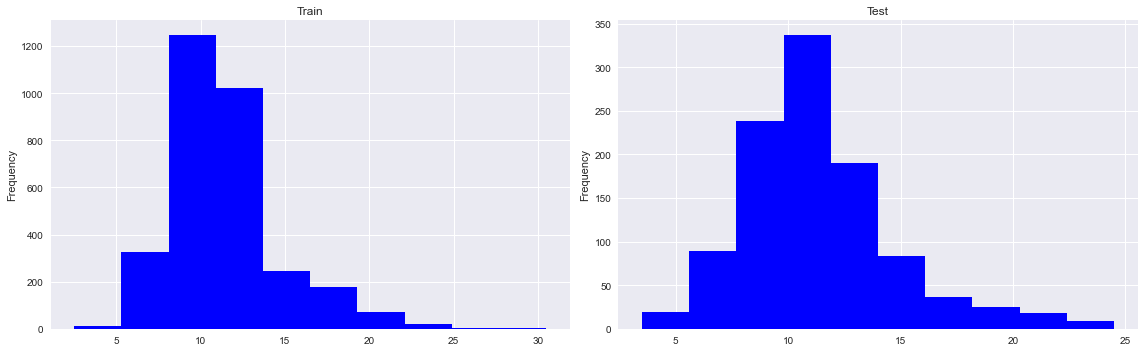

In [60]:
fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

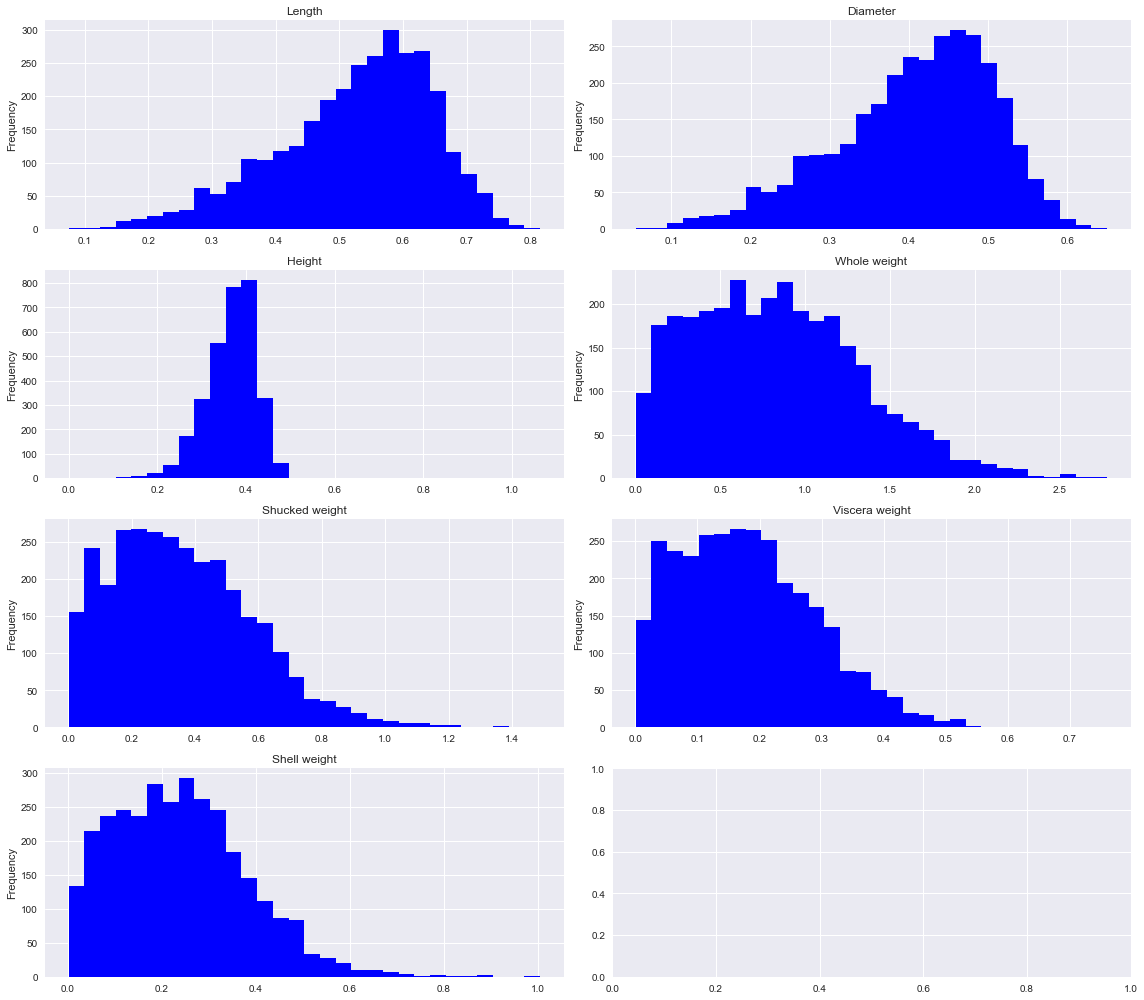

In [61]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

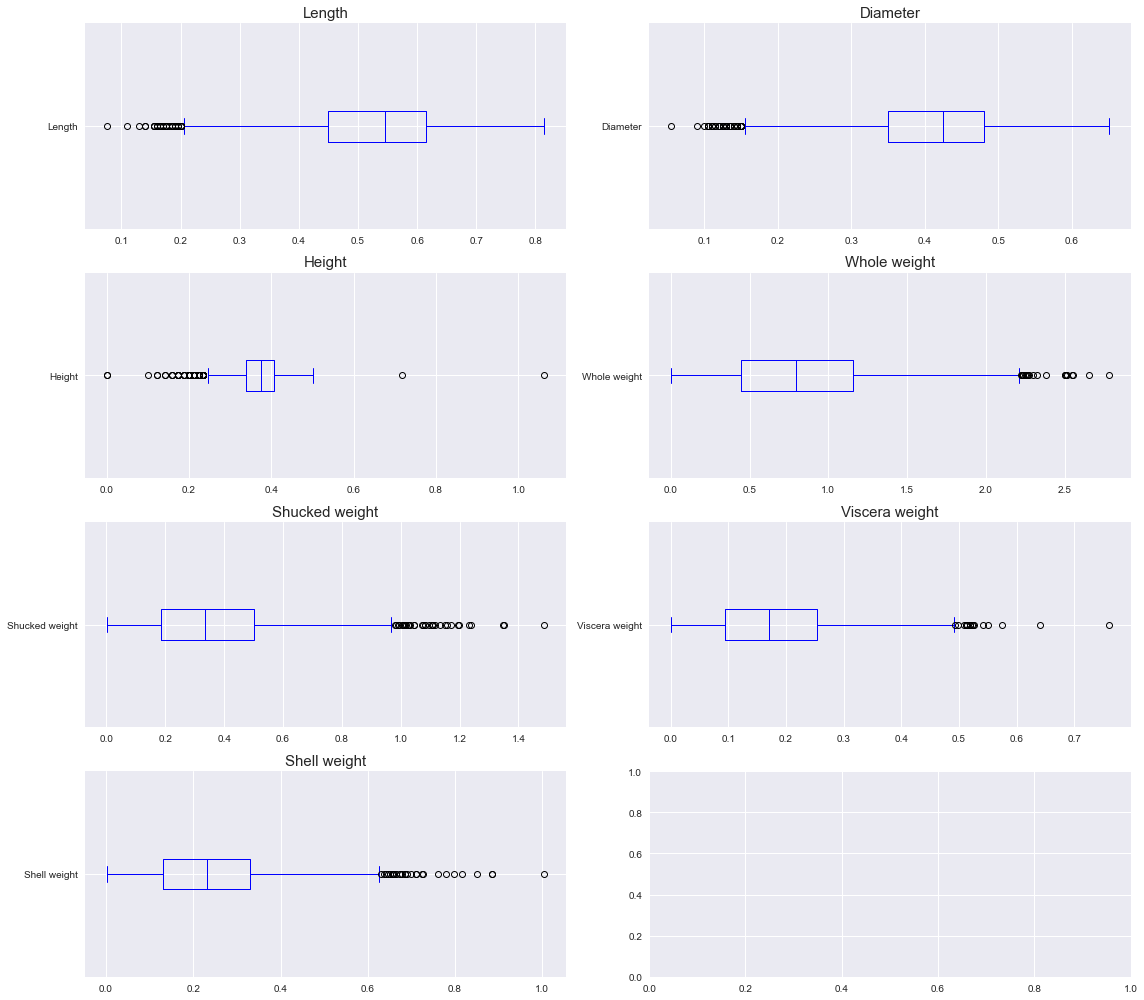

In [62]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()


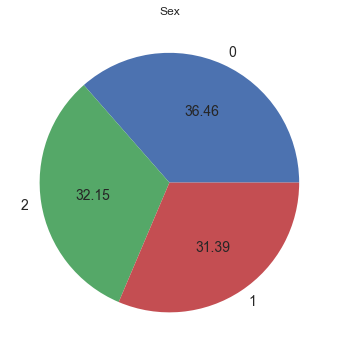

In [64]:
t = train[categorical_feature].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title=categorical_feature,
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()


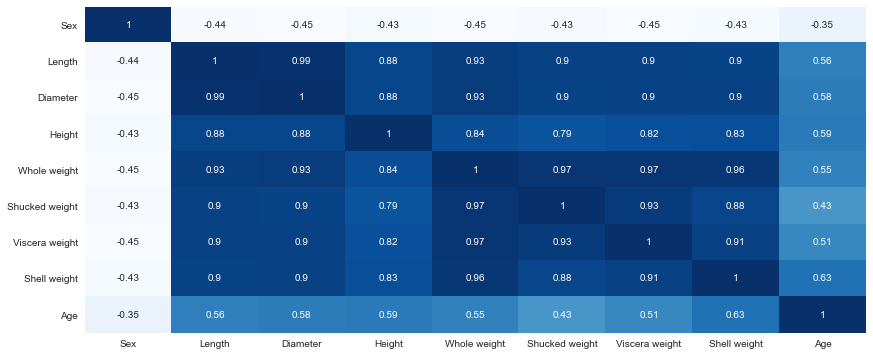

In [65]:
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='Blues')
plt.show()

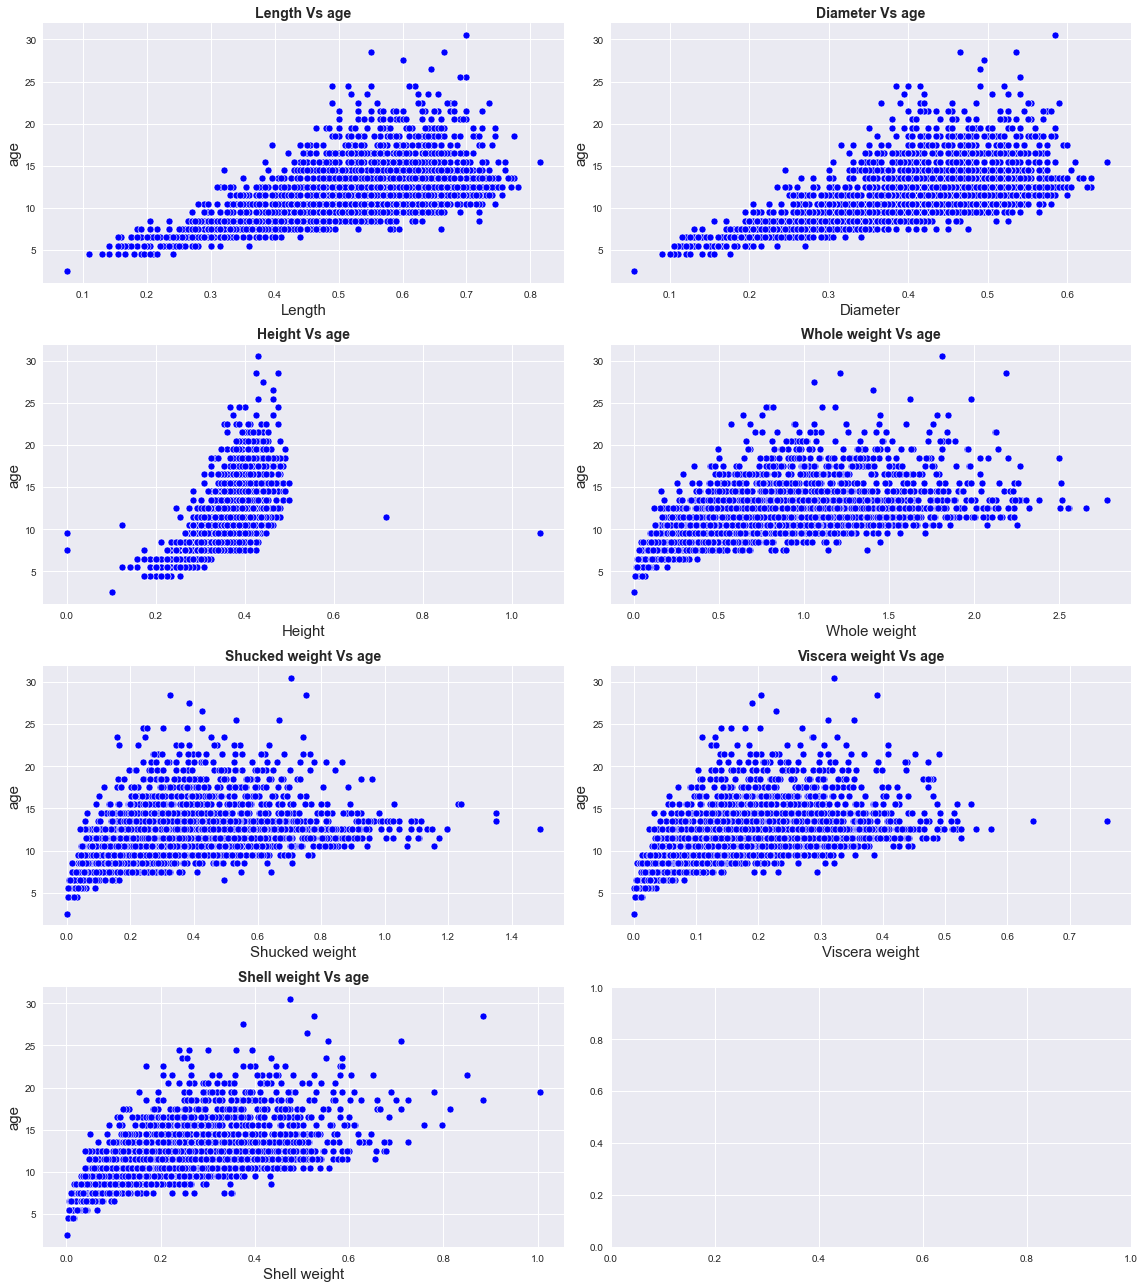

In [66]:
fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=train[c],
                        y=train[target],
                        ax=axes[i],
                        color='blue')
    
    axes[i].set_title(f"{c} Vs age",
                      fontsize=14, 
                      fontweight='bold')
    
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('age', fontsize=15)
    
plt.tight_layout()
plt.show()

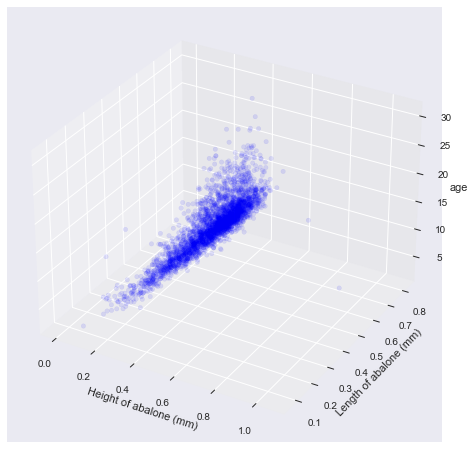

In [67]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('age')
ax.scatter3D(train['Height'],
             train['Length'], 
             train[target],
             c='blue',
             alpha=0.1);

plt.show()

In [68]:
train.Sex = train.Sex.replace({"M":1, "I":0, "F":2})
test.Sex = test.Sex.replace({"M":1, "I":0, "F":2})

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [69]:
idx = train.loc[train.Height>0.4].index
train.drop(idx, inplace=True)

idx = train.loc[train['Viscera weight']>0.6].index
train.drop(idx, inplace=True)

idx = train.loc[train[target]>25].index
train.drop(idx, inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
3252,0.480,0.380,0.360555,0.6175,0.3000,0.1420,0.1750,0
305,0.200,0.145,0.244949,0.0370,0.0125,0.0095,0.0110,2
1857,0.505,0.400,0.380789,0.7045,0.3340,0.1425,0.2070,2
713,0.355,0.265,0.291548,0.2010,0.0690,0.0530,0.0695,0
3553,0.530,0.405,0.360555,0.6615,0.2945,0.1395,0.1900,2


# RandomForestRegressor

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

In [72]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [73]:
print(y_train, model.predict(X_train))
print(y_test, model.predict(X_test))

3252    13.5
305      5.5
1857     9.5
713      9.5
3553    10.5
        ... 
2895    11.5
2763    11.5
905      6.5
3980     8.5
235     10.5
Name: Age, Length: 2223, dtype: float64 [11.37509565  5.46698933 10.41370006 ...  7.51590731  9.97902108
  8.8525576 ]
17      11.5
1131     9.5
299     10.5
1338    11.5
2383    17.5
        ... 
1459     7.5
812      7.5
2535    12.5
462      7.5
3830    15.5
Name: Age, Length: 1045, dtype: float64 [10.7417485  10.39709138 10.12265166 ... 14.07605187  6.51900316
 13.5101526 ]


In [74]:


print("Train rmse : ", mse(y_train, model.predict(X_train)))
print("Test rmse : ", mse(y_test, model.predict(X_test)))

Train rmse :  2.032980776270239
Test rmse :  4.988187467962005


In [75]:
print("Train rmse : ", mse(y_train,model.predict(X_train), squared=False))

Train rmse :  1.4258263485678186


In [76]:
print("Test rmse : ", mse(y_test, model.predict(X_test), squared=False))

Test rmse :  2.233425053132969


In [77]:
data = pd.DataFrame([features, model.feature_importances_]).T
data.columns = ['feature', 'importance']
data.sort_values("importance", ascending=False)

,feature,importance
6,Shell weight,0.233178
3,Whole weight,0.154842
1,Diameter,0.133751
4,Shucked weight,0.118164
5,Viscera weight,0.117019
2,Height,0.111018
0,Length,0.085722
7,Sex,0.046305


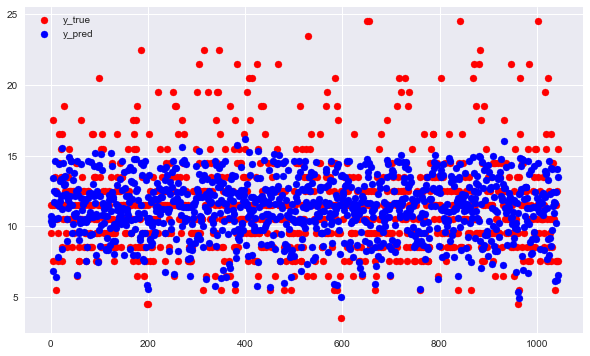

In [78]:
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

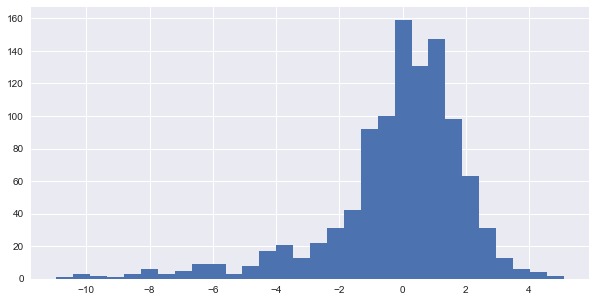

In [79]:
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()

In [80]:
def predict_age(x):
    x = pd.DataFrame([x], columns=features)
    age = model.predict(x)
    return round(age[0],2)

In [81]:
with open("model.pkl", 'rb') as f:
    model = pickle.load(f)
    
# Random sample from test set
ex = [0.295 , 0.225 , 0.08  , 0.124 , 0.0485, 0.032 , 0.04  , 0.]

print("Estimated age : ",predict_age(ex))

Estimated age :  8.97


# KNN regression Model

In [39]:
data.corr()['Age'].sort_values()

Sex              -0.351822
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Age               1.000000
Name: Age, dtype: float64

In [40]:
data1 = data.drop(["Sex", "Shucked weight"], axis=1)

In [41]:
X = data1.drop('Age', axis=1).values
y = data1['Age'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
nn_model = KNeighborsRegressor()

parameters = {"n_neighbors": range(2, 40),
              "weights": ["uniform", "distance"]}

gridsearch_knn = GridSearchCV(KNeighborsRegressor(), parameters, cv=10)
gridsearch_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [43]:
gridsearch_knn.best_params_

{'n_neighbors': 21, 'weights': 'distance'}

In [44]:
best_k = gridsearch_knn.best_params_["n_neighbors"]
best_weights = gridsearch_knn.best_params_["weights"]

bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [45]:
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=21,
                                                    weights='distance'),
                 n_estimators=100)

In [47]:
test_preds_bagg = bagging_model.predict(X_test)
rmse = np.sqrt(mse(y_test, test_preds_bagg))
rmse

2.3840711601151616

# Lieaner regression 

In [48]:

scaler = StandardScaler()
X = data.drop(['Sex', 'Age'], axis = 1)
Y = data.Age.astype('float')[:]
X = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
(X_test.shape,Y_test.shape)

((836, 7), (836,))

In [49]:
Y_train

1160    10.5
1313    10.5
1761    13.5
1122    10.5
233      8.5
        ... 
4060     9.5
2911    12.5
2908    10.5
1481    10.5
2935    11.5
Name: Age, Length: 3341, dtype: float64

In [50]:
import sklearn
from sklearn import linear_model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
lgr = linear_model.LinearRegression()
from sklearn.metrics import mean_absolute_error

# Train the model using the training sets
lgr.fit(X_train,Y_train)
y_predict = lgr.predict(X_train)

print("Mean squared error: %.2f" % mean_absolute_error(Y_train, y_predict))
print("Mean absolute error: %.2f" % mean_absolute_error(Y_train, y_predict))

Mean squared error: 1.59
Mean absolute error: 1.59


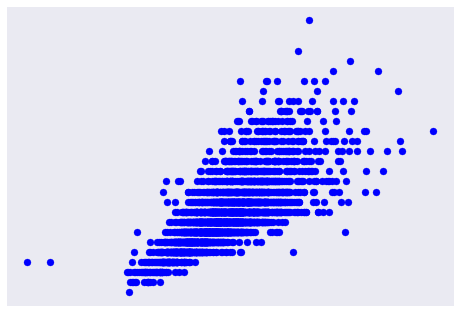

In [52]:
# Plot outputs
plt.scatter(y_predict ,Y_train,  color='blue')
#plt.plot(Y_train_pred ,Y_train, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [57]:
y_test_predict = lgr.predict(X_test)
print("Mean squared error: %.2f" % mse(Y_test, y_test_predict))
print("Mean absolute error: %.2f" % mse(Y_test, y_test_predict))

Mean squared error: 5.10
Mean absolute error: 5.10


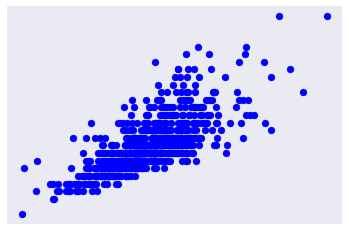

In [63]:
# Plot outputs
plt.scatter(y_test_predict ,Y_test,  color='blue')
#plt.plot(Y_train_pred ,Y_train, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# data = pd.get_dummies(data)
# data.head()

In [ ]:

# X =data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
#        'Viscera weight', 'Shell weight', 'Sex']]
# Y =data['Age']
# X

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
# X_train = sm.add_constant(X_train)
# results = sm.OLS(y_train, X_train).fit()
# results.summary()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# paramLin = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
# LinearReg = GridSearchCV(LinearRegression(),paramLin, cv = 10)
# LinearReg.fit(X = X_train,y= y_train)
# LinearRegmodel = LinearReg.best_estimator_
# print(LinearReg.best_score_, LinearReg.best_params_)

In [ ]:
# LinearReg.score(X_train,y_train)

In [ ]:
# LinearReg.score(X_test,y_test)

In [ ]:
# predictions = LinearReg.predict(X_test)
# plt.scatter(y_test, predictions)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')

In [ ]:
# X2_test = sm.add_constant(X2_test)

# y2_preds = results2.predict(X2_test)

# plt.figure(dpi = 75)
# plt.scatter(y2_test, y2_preds)
# plt.plot(y2_test, y2_test, color="red")
# plt.xlabel("Actual Scores" )
# plt.ylabel("Estimated Scores")
# plt.title("Model: Actual vs Estimated Scores")
# plt.show()

EDA For Modeling

In [41]:
data.skew().sort_values(ascending = False)

Height            3.128817
Age               1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex               0.083056
Diameter         -0.609198
Length           -0.639873
dtype: float64

all of Skewness is colse to 0 as normal distribution , except 'Height ' it have 3 Skewness value , 

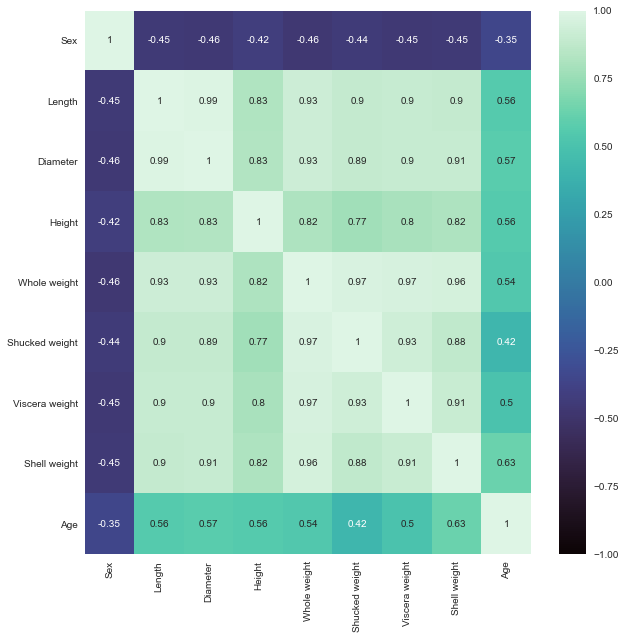

In [42]:
corr = data.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

- no negative coorelation 
- High coorelation between
Length & Diameter // 
Whole weight & Shucked weight // 
Whole weight & Viscera weight // 
Whole weight & Shell weight


In [ ]:
# #remove high correlated virable 
# upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
# columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated
# print("Columns to drop:\n", columns_to_drop)

In [ ]:
# data.drop(columns_to_drop, axis=1, inplace = True)

In [43]:
#Variance Inflation Factor
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_arr(data2):
    vif = pd.DataFrame()
    df1 = sma.add_constant(data2)
    vif["Features"] = data2.columns
    vif['VIF'] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]
    return(vif)

In [44]:
temp = data.drop('Sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,Whole weight,434.764955
5,Viscera weight,64.714393
4,Shucked weight,117.538064
6,Shell weight,82.228741
0,Length,700.805546
2,Height,43.137584
1,Diameter,754.754500
7,Age,26.950721


Text(0.5, 1.0, 'Height vs Sex')

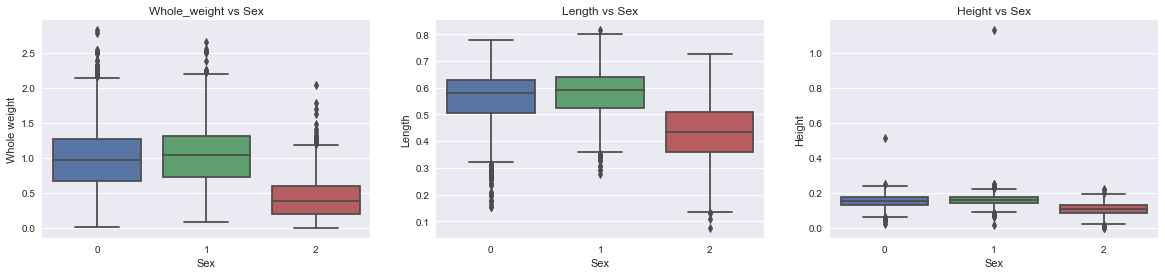

In [45]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Whole weight', data = data, ax = axes[0])
axes[0].set_title('Whole_weight vs Sex')

sns.boxplot(x = 'Sex', y = 'Length', data = data, ax = axes[1])
axes[1].set_title('Length vs Sex')

sns.boxplot(x = 'Sex', y = 'Height', data = data, ax = axes[2])
axes[2].set_title('Height vs Sex')

In [46]:
#Square root transofrmation
data['Height'] = np.sqrt(data['Height'])

In [47]:
data.skew().sort_values(ascending = False)

Age               1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex               0.083056
Height           -0.295641
Diameter         -0.609198
Length           -0.639873
dtype: float64

all var now colse to 0 so it close to gusian distribution 

In [ ]:
# data.hist(figsize = (20,10), layout = (2,4), bins = 30)

Modeling

In [ ]:
# age = []
# for i in data['Whole weight']:
#     if i < 0.6:
#         age.append(1)
#     elif i > 0.6 and i < 1.0 :
#         age.append(2)
#     else:
#         age.append(3)
# data["Age"] = age
# #data_1.drop("Age" , axis =1,inplace=True)
# data.head()

In [ ]:
# sns.countplot('Age', data=data)
# plt.title('Distributed Classes')
# plt.show()

In [ ]:
# new_data = pd.get_dummies(data, columns = ['Sex'], prefix_sep='_', drop_first = True)
# new_data['Age'].value_counts()

#Variance Inflation Factor for all feathers 

In [ ]:
# vif_arr(new_data).sort_values(by = 'Features', ascending = False)

In [ ]:
# new_data['Length'] = np.sqrt(new_data['Length'])
# vif_arr(new_data).sort_values(by = 'Features', ascending = False)

Independent & Dependent

In [ ]:
# X = new_data.drop('Age', axis = 1)
# y = new_data['Age']

In [ ]:
# # split X and y into training and testing sets
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# from sklearn.feature_selection import SelectFromModel

# sc = StandardScaler()
# sc.fit(X_train)
# Xt_fit = sc.fit(X_train)
# Xs_fit = sc.fit(X_test)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)
# X_train_std = Xt_fit.transform(X_train)
# X_test_std = Xs_fit.transform(X_test)


In [ ]:
# X_train = X_train_std
# X_test = X_test_std
# y_train = y_train
# y_test = y_test

In [ ]:


# classifiers = {"LogisiticRegression": LogisticRegression(),
#                "KNearest": KNeighborsClassifier(),
#                "Support Vector Classifier": SVC(),
#                "DecisionTreeClassifier": DecisionTreeClassifier()}

# for key, classifier in classifiers.items():
#     classifier.fit(X_train, y_train)
#     training_score = cross_val_score(classifier, X_train, y_train, cv=5)
#     print("Classifiers: ", classifier.__class__.__name__, 
#           "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

# Logistic_Regression

In [ ]:
# df_1['age'].value_counts()


In [ ]:
# df_1 = data.copy()

In [ ]:
# baseline_y_pred = [baseline_prob for _ in range(len(y_test))]
# avg_logloss = log_loss(y_test, baseline_y_pred)

In [ ]:
# y_train.columns

In [ ]:
# baseline_prob

In [ ]:
# avg_logloss

In [ ]:
# baseline_prob = np.mean(X_train)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss

# lr_model_all = LogisticRegression(C=10000)
# lr_model_all.fit(X_train, y_train)
# y_prob_pred_test = lr_model_all.predict_proba(X_test)[:,1]
# print(log_loss(y_test,y_prob_pred_test))

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss

# for col in X_train :
#     print(col)
#     X_tr = X_train[[col]]
#     X_te = X_test[[col]]
#     lr_model = LogisticRegression()
#     lr_model.fit(X_tr,y_train)
#     y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
#     print(log_loss(y_test,y_prob_pred_test))

In [ ]:
# svc = SVC(C = 1, gamma= 1)
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)

# print('Classification Report: \n', classification_report(y_test, y_pred))
# print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
# svc_train_acc = svc.score(X_train, y_train) 
# print('Training Score: ', svc_train_acc)
# svc_test_acc = svc.score(X_test, y_test)
# print('Testing Score: ', svc_test_acc)

In [ ]:
# age = []
# for i in df_1['Age']:
#     if i > 11.12:
#         age.append('1')
#     else:
#         age.append('0')
# df_1['age'] = age
# df_1.drop('Age', axis = 1, inplace = True)
# df_1.head()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
# Selected_features =  [ 'Length', 'Height', 'Whole weight']
# X = data[Selected_features]
# y = data['Age']

In [ ]:
# X_train = df_1.drop('age', axis = 1).values
# y_train = df_1['age'].values

In [ ]:
# '''Train Test Split , 70:30 Ratio'''
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [ ]:
# #split dataset in features and target variable
# feature_cols = ['Sex', 'Length', 'Height', 'Whole weight']
# X = data[feature_cols] # Features
# y = data.Age # Target variable

In [ ]:
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# grid_log = GridSearchCV(LogisticRegression(), log_reg_params)
# grid_log.fit(X_train, y_train)
# log_reg = grid_log.best_estimator_
# print('Best Estimators: ', log_reg)

In [ ]:
# X_train[['Whole weight']]

In [ ]:
# log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5) #We will use best parameters for modeling
# print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
# model = LogisticRegression(C=1000, solver='newton-cg')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [ ]:
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)

# print('Classification Report: \n', classification_report(y_test, y_pred))
# print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
# lr_train_acc = lr.score(X_train, y_train)
# print('Training Score: ', lr_train_acc)
# lr_test_acc = lr.score(X_test, y_test)
# print('Testing Score: ', lr_test_acc)

In [ ]:
# feature_cols = ['Sex', 'Length', 'Height', 'Whole weight']
# X = data[feature_cols] # Features
# y = data.Age # Target variable

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [ ]:
# np.mean(y_train)

In [ ]:
# X_train['Whole weight'].hist()

In [ ]:
# mask1 = (X_train['Whole weight']>=0.0) & (X_train['Whole weight']<=0.3)
# mask2 = (X_train['Whole weight']>=0.6) & (X_train['Whole weight']<=1.2)
# mask3 = (X_train['Whole weight']>=1.4) &(X_train['Whole weight']<=1.6)

In [ ]:
# mask1.head()

In [ ]:
# np.mean(y_train[mask1]), np.mean(y_train[mask2]), np.mean(y_train[mask3])

In [ ]:
# # Make histogram
# fig, ax = plt.subplots(5, 1, figsize=(10, 12))  # 3 Rows, 1 Col

# count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Height'], bins=25, range=(0,50))
# count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Height'], bins=25, range=(0,50))
# ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [ ]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [ ]:
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(y_train)
# print(training_scores_encoded)
# print(utils.multiclass.type_of_target(y_train))
# print(utils.multiclass.type_of_target(y_train.astype('int')))
# print(utils.multiclass.type_of_target(training_scores_encoded))

In [ ]:
# logreg = LogisticRegression()
# logreg.fit(X_train, training_scores_encoded)
# print("LogisticRegression")
# y_pred=logreg.predict(X_test)
# y_pred

In [ ]:
# from sklearn import metrics
# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# feature_cols = ['Sex', 'Length', 'Height', 'Whole weight']
# X = data[feature_cols]
# y = data['Age']
# # Build a logreg and compute the feature importances
# model = LogisticRegression()
# # create the RFE model and select 8 attributes
# rfe = RFE(model, 8)
# rfe = rfe.fit(X, y)
# # summarize the selection of the attributes
# print('Selected features: %s' % list(X.columns[rfe.support_]))

In [ ]:
# from sklearn.feature_selection import RFECV
# # Create the RFE object and compute a cross-validated score.
# # The "accuracy" scoring is proportional to the number of correct classifications
# rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
# rfecv.fit(X, y)

# print("Optimal number of features: %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X.columns[rfecv.support_]))

# # Plot number of features VS. cross-validation scores
# plt.figure(figsize=(10,6))
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [ ]:
# Selected_features =  ['Sex', 'Length', 'Height', 'Whole weight']
# X = data[Selected_features]

# plt.subplots(figsize=(8, 5))
# sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
# plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
# from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# # create X (features) and y (response)
# X = data[Selected_features]
# y = data['Age']

# # use train/test split with different random_state values
# # we can change the random_state values that changes the accuracy scores
# # the scores change a lot, this is why testing scores is a high-variance estimate
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



In [ ]:
# '''Creating Object of LogisticRegression'''
# logreg = LogisticRegression()
# '''Learning from Training Set'''
# logreg.fit(X_train, Y_train)
# '''Predicting for Training Set'''
# Y_pred = logreg.predict(X_test)
# '''Accuracy Score'''
# result_acc = accuracy_score(Y_test,Y_pred) 

In [ ]:
# result_acc

In [ ]:
# data['newAge'] = np.where(data['Age'] > 10,1,0)

In [ ]:
# Xtrain = data.drop(['newAge','Age','Sex'], axis = 1)
# Ytrain = data['newAge']

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [ ]:
# logreg = LogisticRegression()
# '''Learning from Training Set'''
# logreg.fit(X_train, Y_train)
# '''Predicting for Training Set'''
# Y_pred = logreg.predict(X_test)
# '''Accuracy Score'''
# result_acc = accuracy_score(Y_test,Y_pred) 

